# Trabajo final CDB: Fases de sueño


Manel Soler  
Manuel Jiménez

### Carga de librerías

In [1]:
import numpy as np
import yasa
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import random
import mne
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Cargado y limpieza de datos

Esta primera función que hemos definido es para la limpieza de los 3 archivos que queremos importar, que son **raw**: las fases del sueño, **hypno**: las etiquetas puestas por los médicos y **df_**: que son las etiquetas de los médicos con algunas anotaciones al respecto.

In [3]:
def importar_data(raw,hypno,df_):
    print(raw.ch_names)
    raw.resample(100)
    sf = raw.info['sfreq']
    raw.filter(0.3, 49)
    datos = raw.get_data() * 1e6
    print(datos.shape)


    # quitamos las 30 últimas muestras .
    lenght = datos.shape[1] - 30*30*100

    data=datos[:,0:lenght]
    num = data.shape[1]/(30*100)

    #importación fases de sueño
    hypno
    hypno[hypno==5]=4
    hypno=hypno[0:hypno.shape[0]-30]

    hypno_up=yasa.hypno_upsample_to_data(hypno,sf_hypno=1/30,data=data,sf_data=100)

    print(len(hypno))

    sls = yasa.SleepStaging(raw, eeg_name="C4-A1", eog_name="LOC-A2", emg_name="X1")
    data_sls = sls.get_features()
    np.shape(data_sls)

    data_sls_2 = data_sls.drop(np.arange(len(data_sls-30),len(data_sls)),axis = 0)

    #  excel df_
    df_=df_[0:df_.shape[0]-30]
    # df_8.head()
    df1_ = df_[df_['Events'].isna()]
    df2_ = df1_[pd.to_numeric(df1_['HR'], errors='coerce').notnull()]
    lista_ = df2_.index
    lista_=lista_.tolist()

    hypno = hypno[lista_]
    data_sls_2 = data_sls_2.loc[lista_,:]
    df = extract_sd(data,raw.ch_names )

    df = df.loc[lista_]

    df = df.iloc[:,0:9]

    data_sls_2 = pd.concat([data_sls_2, df], axis=1)

    #normalizamos
    data_sls_2=(data_sls_2-data_sls_2.min())/(data_sls_2.max()-data_sls_2.min())

    return(data_sls_2, hypno)




Aquí hemos creado una función para calcular la desviación estándar cada 30 segundos.


In [4]:
def extract_sd(data, colnames):

    r = []
    for i in range (0,data.shape[1],30*100):
        df = {}
        for c in range(0,data.shape[0]):
            df[colnames[c]] = np.std(data[c,i:(i+30*100)])
        r.append(df)
        
    return(pd.DataFrame(r))
    

Con este bucle ahora importamos los distintos archivos y les aplicamos la función recién creada para la limipieza y tranformación.

In [5]:
# assign dataset names
list_of_names = ['1','2','3','4','5','6','7','8','9','10']

# create empty list
# dataframes_list = []
# d = {}

# append datasets into the list
for i in range(len(list_of_names)):
    raw = mne.io.read_raw_edf(list_of_names[i]+"/"+list_of_names[i]+".edf", preload=True)
    hypno = pd.read_csv(list_of_names[i]+"/"+list_of_names[i]+'_1.txt',header=None).squeeze("columns")
    df_=pd.read_excel(list_of_names[i]+"/"+list_of_names[i]+'_1.xlsx')

    df, hypno = importar_data(raw,hypno,df_)
    # raw_dfs = mne.io.read_raw_edf('8/8.edf', preload=True)
    # dataframes_list.append(raw_dfs)
    # raw+str(list_of_names[i]) = raw_dfs
    globals()['df%s' % list_of_names[i]] = df
    globals()['hypno%s' % list_of_names[i]] = hypno
    # for x in range(1, 10):
    # d["raw{0}".format(i)] = raw_dfs
# return(raw_dfs)

Extracting EDF parameters from C:\Users\34695\Desktop\Master\Biomedicina\Trabajo_Fases_Sueno\1\1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5723999  =      0.000 ... 28619.995 secs...
['LOC-A2', 'ROC-A1', 'F3-A2', 'C3-A2', 'O1-A2', 'F4-A1', 'C4-A1', 'O2-A1', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'DC3', 'X7', 'X8', 'SaO2', 'DC8']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 49 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 49.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 49.50 Hz)
- Filter length: 1101 samples (11.010 sec)

(19, 2862000)
924
Extracting EDF parameters 

Setting up band-pass filter from 0.3 - 49 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 49.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 49.50 Hz)
- Filter length: 1101 samples (11.010 sec)

(19, 2907000)
939
Extracting EDF parameters from C:\Users\34695\Desktop\Master\Biomedicina\Trabajo_Fases_Sueno\10\10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4775999  =      0.000 ... 23879.995 secs...
['LOC-A2', 'ROC-A1', 'F3-A2', 'C3-A2', 'O1-A2', 'F4-A1', 'C4-A1', 'O2-A1', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'DC3', 'X7', 'X8', 'SaO2', 'DC8']
Filtering raw data in 1 contiguous segment
Setting up band-pass fil

## CLASIFICACIÓN.

Ya tenemos las características extraídas de los sujetos 8,9 y 10. 

Ahora vamos a entrenar un clasificador con el 8 y 9 y utilizaremos el 10 para validar.

In [6]:
# juntamos los d.f de las caracterísiticas 8 y 9:
X_train = pd.concat([df2,df3,df4,df5,df6,df7,df8,df9], axis=0)
y_train = pd.concat([hypno2, hypno3,hypno4,hypno5,hypno6,hypno7,hypno8,hypno9], axis=0)

In [7]:
X_test = pd.concat([df1,df10], axis=0)
y_test = pd.concat([hypno1,hypno10], axis=0)

In [8]:
X_test2 = df1
y_test2 = hypno1

In [9]:
X_test.index = np.arange(len(X_test.index))

y_test.index = np.arange(len(y_test.index))

X_train.index = np.arange(len(X_train.index))

y_train.index = np.arange(len(y_train.index))

In [10]:
#X_train, X_test, y_train, y_test = train_test_split(full_data, full_hypno, test_size=0.25, random_state=42)

## Clasificador : Random Forest

Vamos a utilizar como clasificador un random Forest con todas las vairables disponibles en el data set . 

A partir de sus predicciones en terminos de probabilidad, intetaremos ajustar los umbrales para realizar la predicción

In [11]:
rfc=RandomForestClassifier(random_state=42)

In [12]:
param_grid = { 
    'n_estimators': [ 800,1000],
    'max_features': ['auto', 'log2'],
    'max_depth' : [None,10]
}

In [13]:
# from sklearn.model_selection import GridSearchCV
# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, y_train)

In [14]:
# CV_rfc.best_params_

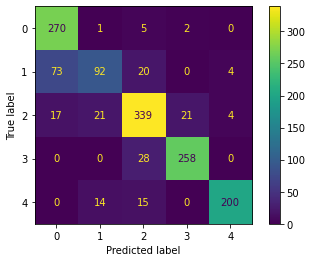

              precision    recall  f1-score   support

           0       0.75      0.97      0.85       278
           1       0.72      0.49      0.58       189
           2       0.83      0.84      0.84       402
           3       0.92      0.90      0.91       286
           4       0.96      0.87      0.92       229

    accuracy                           0.84      1384
   macro avg       0.84      0.82      0.82      1384
weighted avg       0.84      0.84      0.83      1384



In [15]:


# Creación del modelo
# ==============================================================================
modelo = RandomForestClassifier(
            n_estimators = 800,
            max_depth    = None,
            max_features = 'auto',
            oob_score    = True,
            n_jobs       = -1,
            random_state = 0
         )

# Entrenamiento del modelo
# ==============================================================================
modelo.fit(X_train, y_train)

# Error de test del modelo inicial
# ==============================================================================
pred = modelo.predict(X = X_test)

importances = pd.DataFrame(data={
    'Attribute': df10.columns,
    'Importance': modelo.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
plot_confusion_matrix(modelo, X_test, y_test)  
plt.show()
print(classification_report(y_test,pred))


In [16]:
## con estp podriamos clacular manualmente las curva ROC

score = modelo.predict_proba(X = X_test)
score[429]
#pred[429]


array([0.0625 , 0.225  , 0.03875, 0.00125, 0.6725 ])

##  Nos quedamos con las variables más importantes

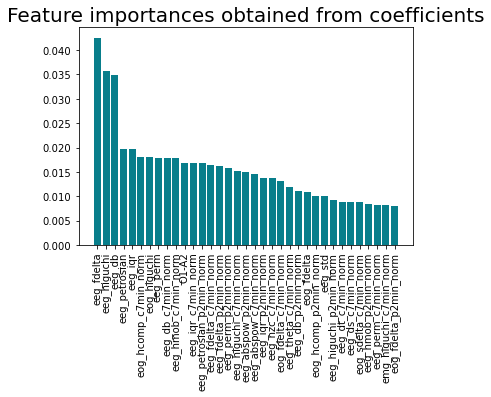

In [17]:
plt.bar(x=importances['Attribute'][0:35], height=importances['Importance'][0:35], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [18]:

#X_train, X_test, y_train, y_test = train_test_split(X2, hypno, test_size=0.25, random_state=42)


## FUNCIÓN : ROC CURVE

Para visualizar los resultados obtenidos, vamos a gráicar la Curva ROC para cada una de las etiquetas. 

Además, guardaremos en la variable `thr` los umbrales para los que la tasa de fpr está alrededor del 5%. Esto lo utilizaremos después en la consideración de un modelo con validez clínica

In [19]:
tags = np.arange(0,5)
from sklearn import metrics

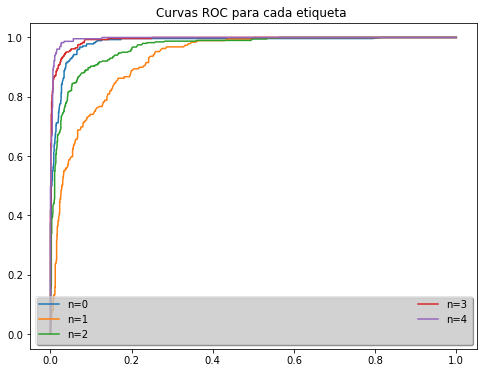

In [20]:
pred_lab = np.arange(0,len(y_test))
plt.rcParams["figure.figsize"] = (8,6)
thr = []
for i in tags :
    pred_lab[y_test == i] = 1
    pred_lab[y_test != i] = 0
    
    fpr, tpr, thresholds = metrics.roc_curve(pred_lab, score[:,i])
    plt.plot(fpr,tpr,label="n=%d"%(i,))
    for t in range(len(fpr)):
        if (fpr[t] > 0.004 and fpr[t] < 0.005):
            thr.append(thresholds[t])
            break

    leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title("Curvas ROC para cada etiqueta ")


    
plt.show()

Vemos que, como era de esperar, las etiquetas 1 y 2 correspondientes a las fases del sueño N1 y N2 son las que presentan peoroes resultados. Como se explicaba en los artículos  de referencia [https://pubmed.ncbi.nlm.nih.gov/26589468/] y  [https://www.sciencedirect.com/science/article/pii/S095741741300403X] estas etapas son las más dificiles. Esto podría deberse a que N1 es una fase de transición entre la vigilia y las diferentes etapas del sueño, como se discute en *Himanen y Hasan (2000)*. De hecho, las señales neurofisiológicas de las etapas N1 y N2 presentan similitudes entre sí y una mezcla de patrones con similitudes a las etapas de vigilia, N3 y REM ; por ejemplo, las épocas N1 pueden presentar actividad alfa (típica de la etapa de vigilia) y pueden presentar actividad theta (típica de la etapa de sueño N2).


Además, la mayoría de las veces el estadio de sueño N2 se clasifica automáticamente como N1 o N3. En lo que respecta a las similitudes de patrones entre N2 y N3, los casos críticos son las épocas de transición: épocas con un porcentaje relevante de ondas lentas pero no lo suficiente como para ser clasificadas como etapa de sueño N3.



## Assignamos umbrales y clasificamos por probabilidad


La Curva ROC pone de manifiesto que tenemos un problema a la hora de clasificar las etapas N1 y N2 ( etiquetas 1 y 2). Vemos que gran parte de la confusión viene por adjudicar la etiqueta 0 (*awake*) a este tipo de muestras. 

Por lo tanto, vamos a calcular que umbrales de probabilidad debemos establecer para intentar solucionar estas confusiones.

Para ello vamos a calcular que umbral maximiza el **F-score** en todas las clases.


También vamos a utitlizar el umbral de la etiqueta 0 para no asignar ninguna clase a cada muestra etiquetada como 0 que no supere este umbral. Esta deicisión la hemos tomado tras ver que muchas de las confusiones son atribuidas a las muestras 0




## F-score : 

F-score es la media armónica entre la precisión y el recall. Donde  la precisión es el número de resultados positivos verdaderos dividido por el número de todos los resultados positivos, incluidos los no identificados correctamente, y el recall es el número de resultados positivos verdaderos dividido por el número de todas las muestras que deberían haberse identificado como positivas


El valor más alto posible de una puntuación F es 1,0, que indica una precisión y una recuperación perfectas, y el valor más bajo posible es 0, si la precisión o la recuperación son cero.




In [21]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

In [22]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
for i in tags:
# define thresholds
    thresholds = np.arange(0, 1, 0.001)

    pred_lab[y_test == i] = 1
    pred_lab[y_test != i] = 0

    # evaluate each threshold
    scores = [f1_score(pred_lab, to_labels(score[:,i], t)) for t in thresholds]
    # get best threshold
    ix = np.argmax(scores)
    print('Label = %.f, Threshold=%.3f, F-Score=%.5f' % (i,thresholds[ix], scores[ix]))

Label = 0, Threshold=0.592, F-Score=0.88502
Label = 1, Threshold=0.276, F-Score=0.65163
Label = 2, Threshold=0.422, F-Score=0.85498
Label = 3, Threshold=0.421, F-Score=0.91537
Label = 4, Threshold=0.302, F-Score=0.94298


In [23]:
pred_et = np.arange(0,len(score))
for i in range(len(score)):
    
    pred_et[i] = np.argmax(score[i])
    
    if score[i,1] > 0.275 and pred_et[i] == 0 and  score[i,2] < score[i,1] and score[i,0] < 0.591:
        pred_et[i] = 1
    if score[i,2] > 0.42 and pred_et[i] == 0 and score[i,2] > score[i,1]  and score[i,0] < 0.591 :
        pred_et[i] = 2
        
    # si no superan el threshold as etiquetamos como 5. % se riefere a que faltan por etiqeutar
    if pred_et[i] == 0 and score[i,0] < 0.591 :
        pred_et[i] = 5

        

In [24]:
print(classification_report(y_test,pred_et))


              precision    recall  f1-score   support

           0       0.86      0.91      0.88       278
           1       0.75      0.60      0.67       189
           2       0.83      0.84      0.84       402
           3       0.92      0.90      0.91       286
           4       0.96      0.87      0.92       229
           5       0.00      0.00      0.00         0

    accuracy                           0.84      1384
   macro avg       0.72      0.69      0.70      1384
weighted avg       0.87      0.84      0.85      1384



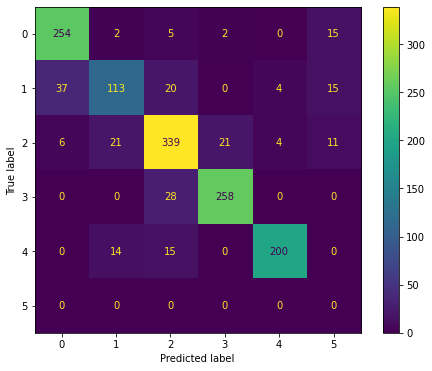

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clases=np.arange(6)

cm = confusion_matrix(y_test, pred_et, labels=clases)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clases)
disp.plot()

plt.show() 

 ## Minimizando los falsos positivos
 
 Queremos un modelo útil clinicamente. Por lo que no podemos permitir que tenga un número de clasificaciones erróneas considerable. Vamos a minimizar los falsos positivos hasta un umbral máximo del 5%. El umbral ya lo habíamos calculado previamente en el gráfico de la curva roc.

In [26]:
thr

[0.8125, 0.59625, 0.67875, 0.655, 0.6125]

In [27]:
pred_et2 = np.arange(0,len(score))
for i in range(len(score)):
    
    pred_et2[i] = np.argmax(score[i])
    
    #if score[i,1] > 0.5925 and pred_et[i] == 0 and  score[i,2] < score[i,1] and score[i,0] < 0.8:
#         pred_et[i] = 1
#     if score[i,2] > 0.67 and pred_et[i] == 0 and score[i,2] > score[i,1]  and score[i,0] < 0.8 :
#         pred_et[i] = 2
        
    # si no superan el threshold las etiquetamos como 5. % se riefere a que faltan por etiqeutar
    if pred_et2[i] == 0 and score[i,0] <= thr[0] :
        pred_et2[i] = 5
    if pred_et2[i] == 1 and score[i,1] <= thr[1] :
        pred_et2[i] = 5
    if pred_et2[i] == 2 and score[i,2] <= thr[2] :
        pred_et2[i] = 5
    if pred_et2[i] == 3 and score[i,3] <= thr[3] :
        pred_et2[i] = 5
    if pred_et2[i] == 4 and score[i,4] <= thr[4] :
        pred_et2[i] = 5

    

              precision    recall  f1-score   support

           0       0.97      0.51      0.67       278
           1       0.78      0.07      0.14       189
           2       0.98      0.39      0.56       402
           3       0.98      0.80      0.88       286
           4       0.97      0.67      0.80       229
           5       0.00      0.00      0.00         0

    accuracy                           0.50      1384
   macro avg       0.78      0.41      0.51      1384
weighted avg       0.95      0.50      0.63      1384



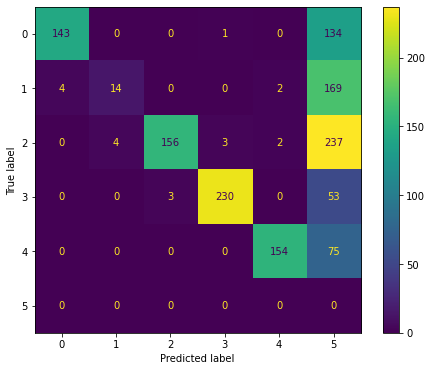

In [28]:
print(classification_report(y_test,pred_et2))
confusion_matrix( y_test,pred_et2) 

cm = confusion_matrix(y_test,pred_et2, labels=clases)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clases)
disp.plot()

plt.show() 

## Interpretabilidad del modelo   : SHAPLEY VALUES

Vamos a intentar forzar la interpretabilidad del modelo a partir de los shapley values.

* El valor de Shapley, es un método para asignar pesos a las características en función de su contribución a la predicción total. Las características cooperan en una coalición y reciben un determinado beneficio de esta cooperación.

* El valor de Shapley es la contribución marginal media (diferencia entre la predicción real y la predicción media) de un valor de característica en todas las posibles coaliciones posibles.



In [29]:
# import shap library
import shap

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(modelo)
shap_values = explainer.shap_values(X_train)



Wall time: 0 ns
Clase : 0


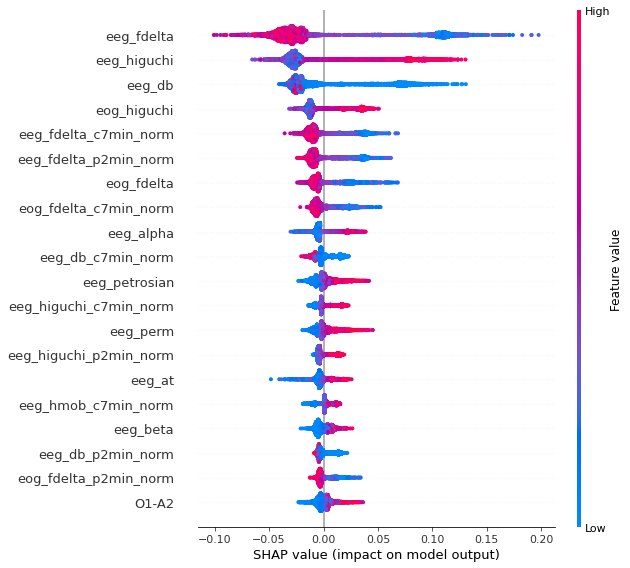

Clase : 1


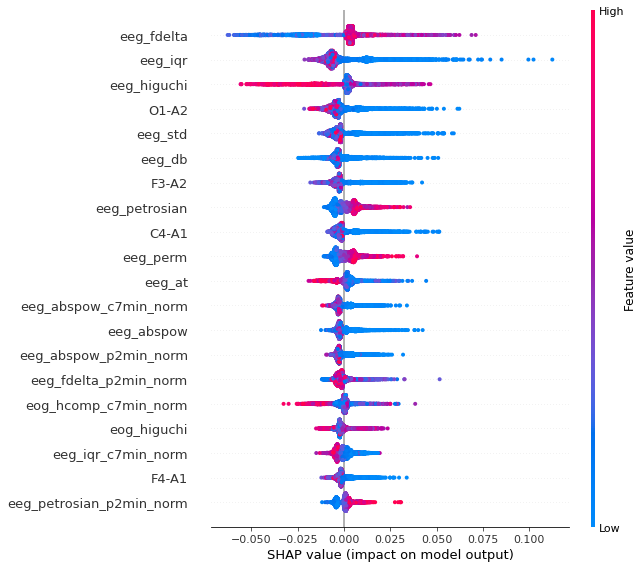

Clase : 2


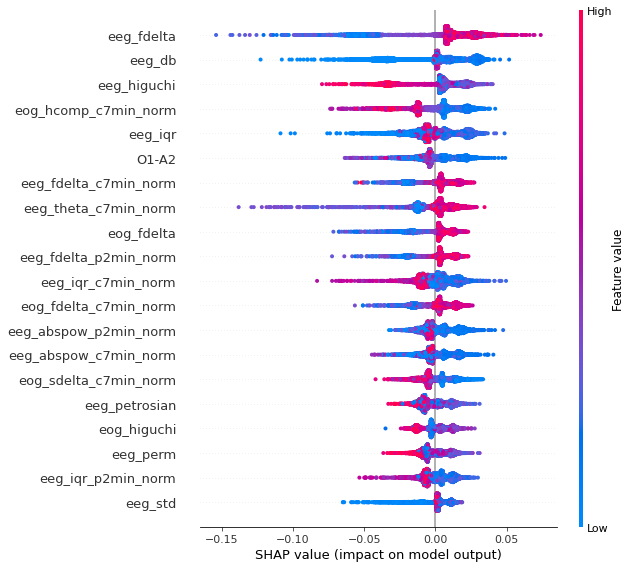

Clase : 3


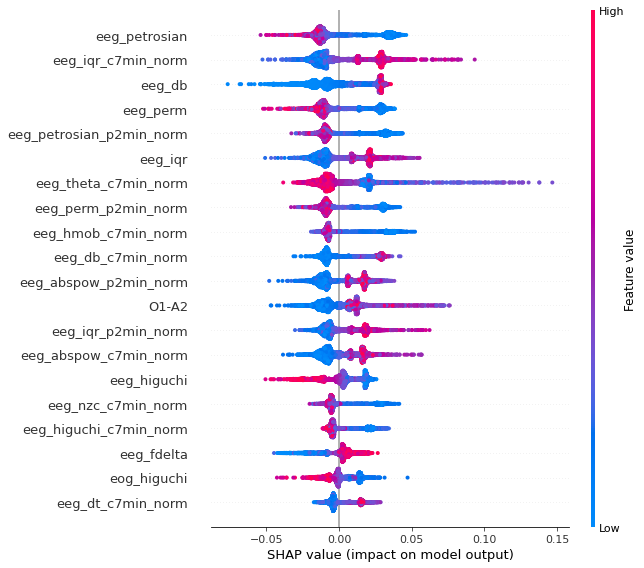

Clase : 4


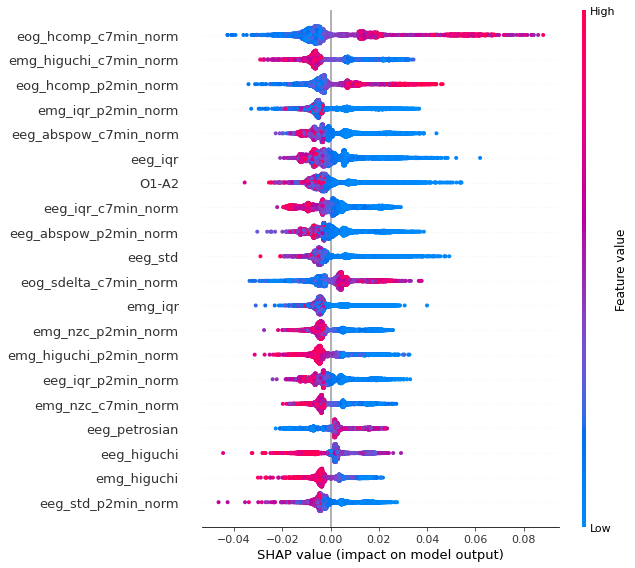

In [30]:

# Let us have a look on SHAP summary plot
%time
samples = X_train
samples.index = np.arange(len(samples.index))

y_train.index = np.arange(len(y_train.index))
#explainer = shap.TreeExplainer(modelo)
#shap_values = explainer.shap_values(samples)
for i in range(0,5):
    print("Clase :", i)
    shap.summary_plot(shap_values[i], samples)


Estos gráficos nos presentan información muy relevante para la predicción de cada clase : 

Por un lado, el eje X nos informa del impacto que tiene cada uno de los datos. El eje Y esta ordenado por importanca, donde las variables que estan en la cima del gráfico, son las mas relevantes para la decisión del modelo. Y por último el color dde los puntos nos informa de que valor toma cada muestra para esa variable. De este modo podemos ver, por ejemplo : como en la clase 4 , cuando las oscilaciones medidas por el electrooculografia  son altas. esto aumenta el impacto sobre el shapley value. Es decir, cuando medimos que los ojos del paciente se estan moviendo , el modelo refuerza esto sobre la idea de que esta en Fase REM.





## Interpretación de errores 

Nos quedamos con los índices que no hemos sabido predecir correctamente

In [31]:
# for i in range(5):
#     aux = pred_et[y_test == i] 
    
indx = []           
for i in range(len(y_test)):
    if (y_test[i] != pred_et[i] and pred_et[i] !=5):
        indx.append(i)
        



#  Force plot

**Es necessario asignar como Trusted este codigo en jupyter collab para poder visaulizar los siguientes gráficos sin ejecutar el código**

Este plot nos permite saber, para cada predicción que variables fuerzan a nuestro modelo a aumentar la probabilidad de clase, o de forma contraria, a reducir esta probabilidad. 


Esto es interessante para entender porque nuestro modelo a decidido etiquetar una muestra con segun que variable

In [32]:



for idx in [indx[88], indx[56]]:
    print(" CLASE:", y_test[idx])    
    shap_values2 = explainer.shap_values(X_test.iloc[idx])
    shap.initjs()


    for which_class in range(0,5):
        print("Probabilidades de para clase :", which_class)
        display(shap.force_plot(explainer.expected_value[which_class], shap_values2[which_class], X_test.iloc[idx]))


 CLASE: 4


Probabilidades de para clase : 0


Probabilidades de para clase : 1


Probabilidades de para clase : 2


Probabilidades de para clase : 3


Probabilidades de para clase : 4


 CLASE: 1


Probabilidades de para clase : 0


Probabilidades de para clase : 1


Probabilidades de para clase : 2


Probabilidades de para clase : 3


Probabilidades de para clase : 4


## Importancia de las Variables segun los shapley Values



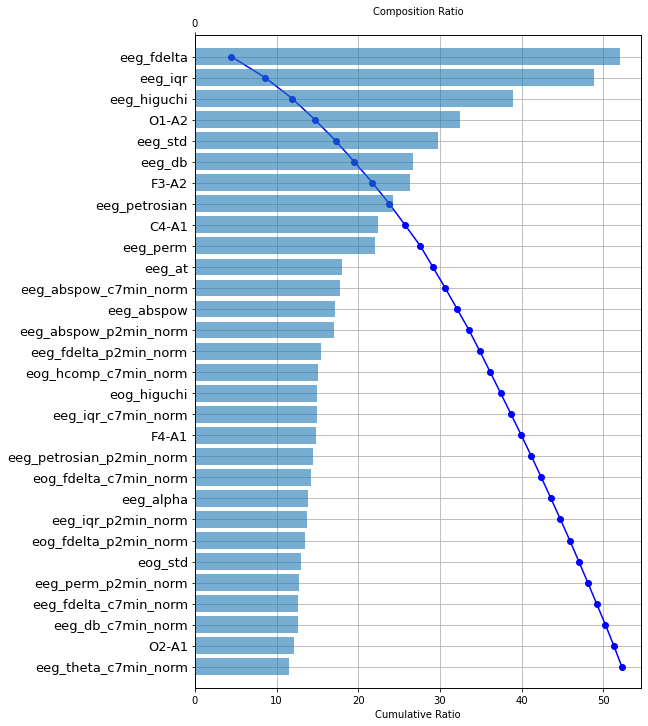

In [33]:
def make_shap_waterfall_plot(shap_values, features, num_display=30):
    column_list = features.columns
    feature_ratio = (np.abs(shap_values).sum(0) / np.abs(shap_values).sum()) * 100
    column_list = column_list[np.argsort(feature_ratio)[::-1]]
    feature_ratio_order = np.sort(feature_ratio)[::-1]
    cum_sum = np.cumsum(feature_ratio_order)
    column_list = column_list[:num_display]
    feature_ratio_order = feature_ratio_order[:num_display]
    cum_sum = cum_sum[:num_display]
    
    num_height = 0
    if (num_display >= 20) & (len(column_list) >= 20):
        num_height = (len(column_list) - 20) * 0.4
        
    fig, ax1 = plt.subplots(figsize=(8, 8 + num_height))
    ax1.plot(cum_sum[::-1], column_list[::-1], c='blue', marker='o')
    ax2 = ax1.twiny()
    ax2.barh(column_list[::-1], feature_ratio_order[::-1], alpha=0.6)
    
    ax1.grid(True)
    ax2.grid(False)
    ax1.set_xticks(np.arange(0, round(cum_sum.max(), -1)+1, 10))
    ax2.set_xticks(np.arange(0, round(feature_ratio_order.max(), -1)+1, 10))
    ax1.set_xlabel('Cumulative Ratio')
    ax2.set_xlabel('Composition Ratio')
    ax1.tick_params(axis="y", labelsize=13)
    plt.ylim(-1, len(column_list))
    return(column_list)
    # Shap waterfall plot
a = make_shap_waterfall_plot(shap_values[1], samples)

Vemos que  con las 40 variables más importantes del modelo tenemos , aproximadamente , un 85% de la interpretabilidad del modelo




En general, vemos como la clase 1 no presenta ninguna característica  que tenga especial impacto en la decisión del modelo. Esto viene en consonancia con lo que ya habiamos comentado, sobre la dificultad de parametrizar esta etapa del sueño

## Modelo con las mejores variables segun los shapley values. 

####  No mejora  la clasificación , pero en cambio, si conseguimos igualar los resultados con solo 40 variables


In [34]:
train2 = samples.loc[:,a]
test2 = X_test.loc[:,a]

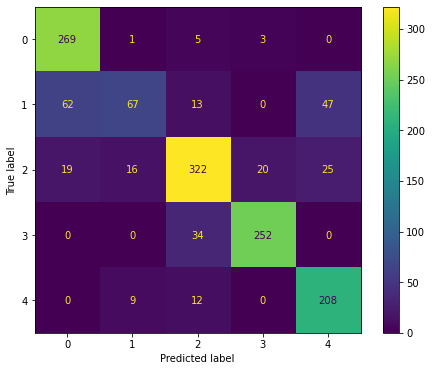

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       278
           1       0.72      0.35      0.48       189
           2       0.83      0.80      0.82       402
           3       0.92      0.88      0.90       286
           4       0.74      0.91      0.82       229

    accuracy                           0.81      1384
   macro avg       0.80      0.78      0.77      1384
weighted avg       0.81      0.81      0.80      1384



In [35]:

# Creación del modelo
# ==============================================================================
modelo = RandomForestClassifier(
            n_estimators = 800,
            max_depth    = None,
            max_features = 'auto',
            oob_score    = True,
            n_jobs       = -1,
            random_state = 0
         )

# Entrenamiento del modelo
# ==============================================================================
modelo.fit(train2, y_train)

# Error de test del modelo inicial
# ==============================================================================
pred = modelo.predict(X = test2)

importances = pd.DataFrame(data={
    'Attribute': train2.columns,
    'Importance': modelo.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
plot_confusion_matrix(modelo, test2, y_test)  
plt.show()
print(classification_report(y_test,pred))

In [36]:
score2 = modelo.predict_proba(X = test2)

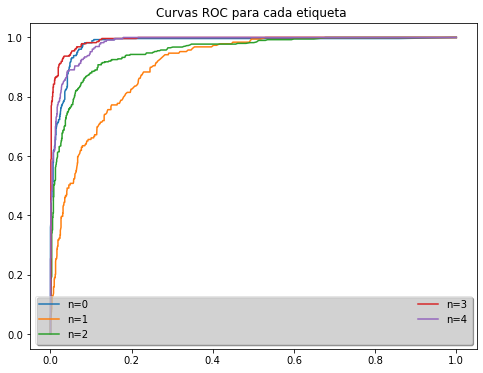

In [37]:
pred_lab = np.arange(0,len(y_test))
plt.rcParams["figure.figsize"] = (8,6)
thr = []
for i in tags :
    pred_lab[y_test == i] = 1
    pred_lab[y_test != i] = 0
    
    fpr, tpr, thresholds = metrics.roc_curve(pred_lab, score2[:,i])
    plt.plot(fpr,tpr,label="n=%d"%(i,))
    for t in range(len(fpr)):
        if (fpr[t] > 0.004 and fpr[t] < 0.007):
            thr.append(thresholds[t])
            break

    leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title("Curvas ROC para cada etiqueta ")


    
plt.show()

In [38]:
pred_et = np.arange(0,len(score))
for i in range(len(score)):
    
    pred_et[i] = np.argmax(score[i])
    
#     if score[i,1] > 0.5925 and pred_et[i] == 0 and  score[i,2] < score[i,1] and score[i,0] < 0.8:
#         pred_et[i] = 1
#     if score[i,2] > 0.67 and pred_et[i] == 0 and score[i,2] > score[i,1]  and score[i,0] < 0.8 :
#         pred_et[i] = 2
        
    # si no superan el threshold las etiquetamos como 5. % se riefere a que faltan por etiqeutar
    if pred_et[i] == 0 and score2[i,0] < thr[0] :
        pred_et[i] = 5
    if pred_et[i] == 1 and score2[i,1] < thr[1] :
        pred_et[i] = 5
    if pred_et[i] == 2 and score2[i,2] < thr[2] :
        pred_et[i] = 5
    if pred_et[i] == 3 and score2[i,3] < thr[3] :
        pred_et[i] = 5
    if pred_et[i] == 4 and score2[i,4] < thr[4] :
        pred_et[i] = 5
  

              precision    recall  f1-score   support

           0       0.96      0.49      0.65       278
           1       0.79      0.10      0.18       189
           2       0.97      0.34      0.50       402
           3       0.98      0.79      0.87       286
           4       0.97      0.48      0.65       229
           5       0.00      0.00      0.00         0

    accuracy                           0.45      1384
   macro avg       0.78      0.37      0.47      1384
weighted avg       0.95      0.45      0.59      1384



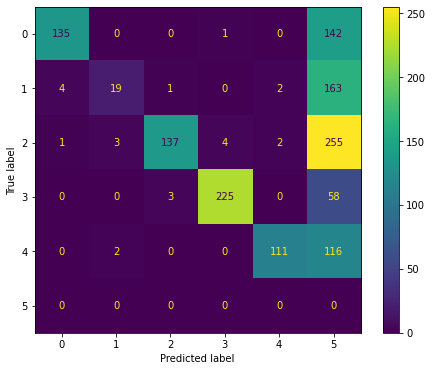

In [39]:
print(classification_report(y_test,pred_et))
confusion_matrix( y_test,pred_et) 

cm = confusion_matrix(y_test,pred_et, labels=clases)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clases)
disp.plot()

plt.show() 

In [40]:
from sklearn.metrics import f1_score
for i in tags:
# define thresholds
    thresholds = np.arange(0, 1, 0.001)

    pred_lab[y_test == i] = 1
    pred_lab[y_test != i] = 0

    # evaluate each threshold
    scores = [f1_score(pred_lab, to_labels(score2[:,i], t)) for t in thresholds]
    # get best threshold
    ix = np.argmax(scores)
    print('Label = %.f, Threshold=%.3f, F-Score=%.5f' % (i,thresholds[ix], scores[ix]))

Label = 0, Threshold=0.577, F-Score=0.87162
Label = 1, Threshold=0.249, F-Score=0.59649
Label = 2, Threshold=0.331, F-Score=0.83514
Label = 3, Threshold=0.434, F-Score=0.91388
Label = 4, Threshold=0.565, F-Score=0.84835


              precision    recall  f1-score   support

           0       0.88      0.80      0.84       278
           1       0.70      0.64      0.67       189
           2       0.83      0.85      0.84       402
           3       0.92      0.90      0.91       286
           4       0.96      0.87      0.92       229
           5       0.00      0.00      0.00         0

    accuracy                           0.83      1384
   macro avg       0.72      0.68      0.70      1384
weighted avg       0.86      0.83      0.84      1384



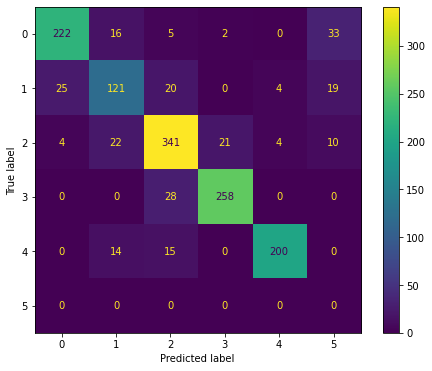

In [41]:
pred_et = np.arange(0,len(score2))
for i in range(len(score2)):
    
    pred_et[i] = np.argmax(score[i])
    
    if score[i,1] > 0.237 and pred_et[i] == 0 and  score[i,2] < score[i,1] and score[i,0] < 0.673:
        pred_et[i] = 1
    if score[i,2] > 0.366 and pred_et[i] == 0 and score[i,2] > score[i,1]  and score[i,0] < 0.673 :
        pred_et[i] = 2
        
    # si no superan el threshold las etiquetamos como 5. % se riefere a que faltan por etiqeutar
    if pred_et[i] == 0 and score[i,0] < 0.673 :
        pred_et[i] = 5

        
print(classification_report(y_test,pred_et))
confusion_matrix( y_test,pred_et) 

cm = confusion_matrix(y_test,pred_et, labels=clases)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clases)
disp.plot()

plt.show() 


# Conclusiones finales

* Hemos intentado aportar una solución a un problema de clasificación de fases del sueño desde una perspectiva clínica. Intentando minimizar los fallos, aunque tuvieramos gran parte de la clasificación con etiqueta de "no clasificada". 

* Por otro lado, para mejorar la interpretabilidad del modelo hemos decidido utilizar los shapley values para intentar explicar el porqué de cada una de las predicciones. Esto resulta útil desde el punto de vista clínico, ya que podemos ver porque el modelo ha decidido etiquetar una fase concreta y juzgar la lógica médica que hay destrás de esta decisión. 


* Como mejora , se propone aumentar el data set con más pacientes. Creemos que un entrenamiento con más datos aportaría la variabilidad que quizás necesite el modelo para determinar patrones entre las fases N1 y N2.


